# Before your start:

    Read the README.md file
    Comment as much as you can and use the resources (README.md file)
    Happy learning!

In this exercise, we  will generate random numbers from the continuous disributions we learned in the lesson. There are two ways to generate random numbers:

1. Using the numpy library 
1. using the Scipy library 

Use either or both of the lbraries in this exercise.

## Uniform Distribution

To generate uniform random numbers between any two given values using scipy, we can either use the following code or the code that we have
discussed in class:

In [19]:
#imports
import numpy as np
import pandas as pd
from scipy.stats import uniform
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [6]:
x = uniform.rvs(size=10)
a = 2
b = 3
randoms  = a + (b-a)*x
print(randoms)

[2.38929428 2.06865301 2.82792292 2.47769984 2.43062219 2.37578051
 2.19960838 2.61206584 2.86374223 2.98655955]


**Your task:**

1. Based on the code above, write a function that generates uniformly distributed random numbers. There are several requirements for your function:
    * It should accept 3 parameters: 
        * `bottom` - the lower boundary of the generated numbers
        * `ceiling` - the upper boundary of the generated numbers
        * `count` - how many numbers to generate
    * It should return an array of uniformly distributed random numbers

1. Call your function with 2 sets of params below:
    * bottom=10, ceiling=15, count=100
    * bottom=10, ceiling=60, count=1,000

1. Plot the uniform distributions generated above using histograms, where x axis is the value and y axis is the count. Let the histogram's number of bins be 10.

In [12]:
# your code here

# 1- function that generates normal distributed random numbers
def random(bottom,ceiling,count):
    x = uniform.rvs(size=count)
    randoms  = a + (b-a)*x
    return randoms

In [13]:
# 2- Call your function1
random1= random(10,15,100)

In [14]:
# 3- Call your function2
random2= random(10,60,1000)

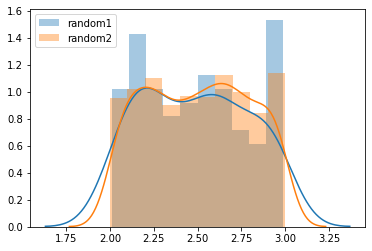

In [15]:
# 4- Plot the uniform distributions generated above 
sns.distplot(random1, bins=10)
sns.distplot(random2, bins=10)
plt.legend(['random1', 'random2']);

How are the two distributions different?

In [3]:
# X-axis depending on ceiling, number of obs in each bin depending on n
#the more observation we use, the more normalize distribution we get.

## Normal Distribution

1. In the same way in the Uniform Distribution challenge, write a function that generates normally distributed random numbers.
1. Generate 1,000 normally distributed numbers with the average of 10 and standard deviation of 1
1. Generate 1,000 normally distributed numbers with the average of 10 and standard deviation of 50
2. Plot the distributions of the data generated.

In [25]:
#1-function that generates normal distributed random numbers
def normal_function(mean,standard_deviation,count):
    return stats.norm(mean, standard_deviation).rvs(size = count)

In [26]:
#2-Call your function1
random1=normal_function(10,1,1000)

In [27]:
#3-Call your function2
random2=normal_function(10,50,1000)

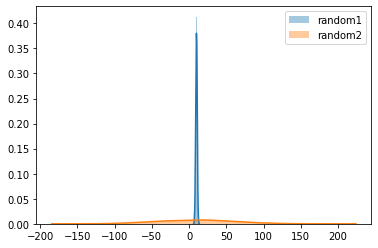

In [28]:
#Plot the uniform distributions generated above 
sns.distplot(random1)
sns.distplot(random2)
plt.legend(['random1', 'random2']);

How are the two distributions different?

In [29]:
# different distrubiton around the mean (x-axis)

#knowing that: The mean determines where the center of the peak is. 
#and: The standard deviation is a measure of how wide the peak is, or how spread out the data are
#we see that in our data the first distribution has a smaller standard deviation of 1 and the second dist hav a bigger standard deviation of 50.

## Normal Distribution of Real Data

In this challenge we are going to take a look the real data. We will use vehicles.csv file for this exercise

First import vehicles.csv.
Then plot the histograms for the following variables:

1. Fuel Barrels/Year

In [31]:
# your code here
data = pd.read_csv('/Users/annavilardell/Desktop/BootcampData/notebooks/data/vehicles.csv')
data.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


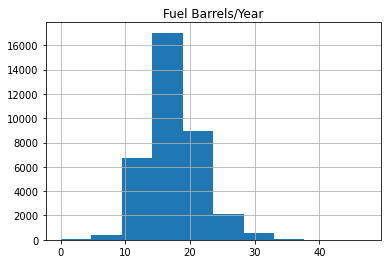

In [35]:
data.hist("Fuel Barrels/Year");

2. CO2 Emission Grams/Mile 

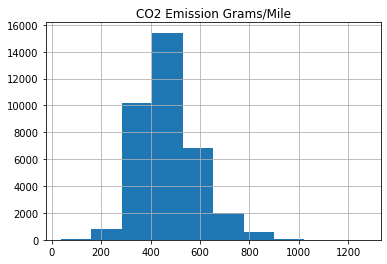

In [36]:
data.hist("CO2 Emission Grams/Mile");

3. Combined MPG

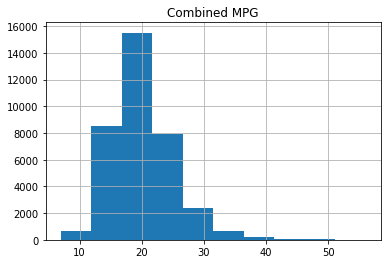

In [37]:
data.hist("Combined MPG");

Which one(s) of the variables are nearly normally distributed? How do you know?

In [6]:
# barrels & emission relatively normal, MPG left skew

## Exponential Distribution

1. Using `numpy.random.exponential`, create a function that returns a list of numbers exponentially distributed with the mean of 10. 

1. Use the function to generate two number sequences with the size of 1 and 100.

1. Plot the distributions as histograms with the nubmer of bins as 100.

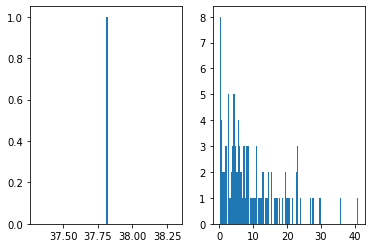

In [45]:
# your code here

#create a function that returns a list of numbers exponentially distributed with the mean of 10
def exponential_function(mean,size):
     return np.random.exponential(mean,size)

#Use the function to generate two number sequences with the size of 1 and 100.
result1= exponential_function(10,1)
result2= exponential_function(10,100)

#Plot the distributions as histograms with the nubmer of bins as 100
fig, [ax1, ax2] = plt.subplots(1,2)
ax1.hist(result1, bins=100);
ax2.hist(result2, bins=100);

How are the two distributions different?

In [8]:
# no variation can be see when size =1

## Exponential Distribution of Real Data

Suppose that the amount of time one spends in a bank is exponentially distributed with mean as 10 minutes (i.e. λ = 1/10). What is the probability that a customer will spend less than fifteen minutes in the bank? 

Write a code in python to solve this problem

In [48]:
# Hint: This is same as saying P(x<15)
stats.expon(1/10).cdf(15)
less15=stats.expon(scale = 10).cdf(15)


0.9999996619256516

What is the probability that the customer will spend more than 15 minutes

In [49]:
stats.expon(1/10).sf(15)

3.3807434839047367e-07